In [3]:
# Imports for linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
import warnings
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

In [6]:
df = pd.read_csv('flight-price-prediction/flight_price_processed.csv')
df.head()

,Stops,Class,Duration,Days Left,Price,Airline_Air_India,Airline_GO_FIRST,Airline_Indigo,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Hyderabad,Source_Kolkata,Source_Mumbai,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,Departure Time_Early_Morning,Departure Time_Evening,Departure Time_Late_Night,Departure Time_Morning,Departure Time_Night,Arrival Time_Early_Morning,Arrival Time_Evening,Arrival Time_Late_Night,Arrival Time_Morning,Arrival Time_Night
0,0,0,-1.397994,-1.843875,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
1,0,0,-1.374820,-1.843875,5953,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
2,0,0,-1.397994,-1.843875,5956,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
3,0,0,-1.386407,-1.843875,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,0,-1.374820,-1.843875,5955,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [7]:
# Define features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 46443345.34
R^2 Score: 0.91


In [13]:
# See which features matter most (Coefficients)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False).head())#

                   Coefficient
Class             45167.580906
Stops              5652.177700
Airline_Vistara    4243.275181
Airline_Indigo     2478.259500
Airline_SpiceJet   2454.633563


In [14]:
# Get coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# 5. Sort by Coefficient value for better visualization
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)

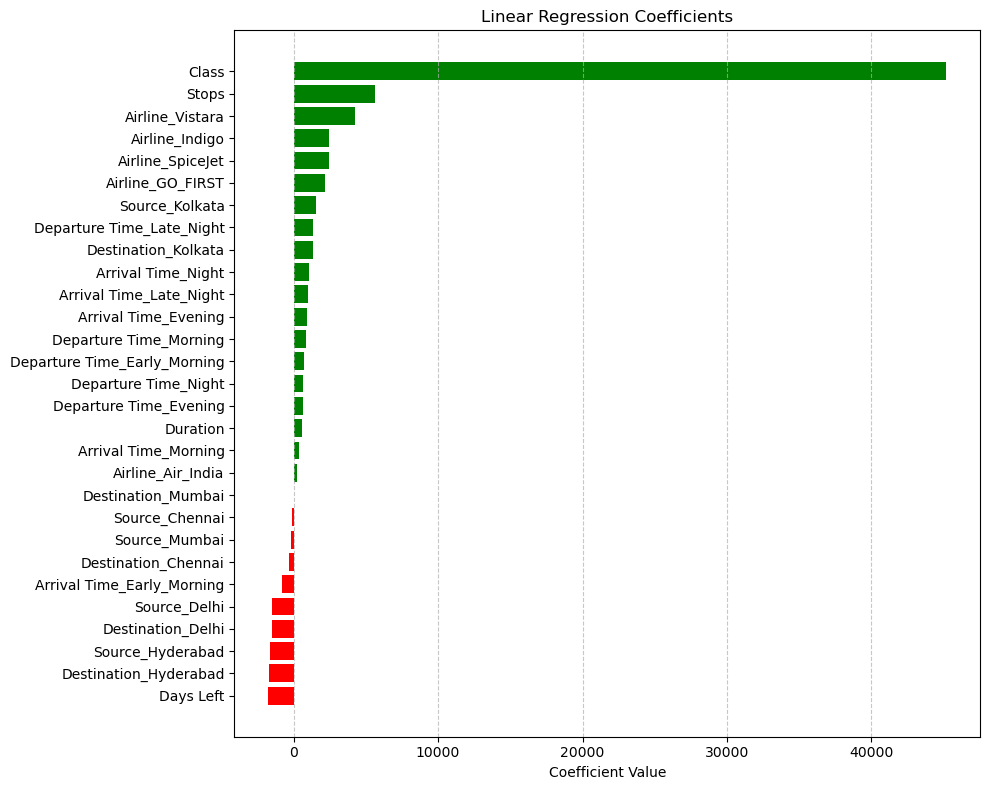

In [15]:
# Plotting the coefficients
plt.figure(figsize=(10, 8))
# Color bars: green for positive, red for negative
colors = ['red' if x < 0 else 'green' for x in coef_df['Coefficient']]
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

In [ ]:
# Save plot
plt.savefig('visualizations/coefficients_plot.png')
print("Coefficient plot saved as 'visualizations/coefficients_plot.png'")

<Figure size 640x480 with 0 Axes>